# **ANOMALY DETECTION IN SOCIAL NETWORK**

---




## **Data Sets used :**



*   Advogato : (http://networkrepository.com/advogato.php)


---



## **Mounting Google Drive :**

In [50]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Importing Packages :**

In [51]:
import pandas as pd
import csv
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
from sklearn import metrics


## **Data Preprocessing**


---




###**Importing Datasets :**


---



In [52]:
d=pd.read_csv('/content/gdrive/My Drive/Dataset/advogato.csv')
print(d[['Source','Destination']])

       Source  Destination
0           1            1
1           1            2
2           1            3
3           1            4
4           1            5
...       ...          ...
51122    6539         6539
51123    6539         1103
51124    6540         6540
51125    6541          658
51126    6541          167

[51127 rows x 2 columns]


### **Creating Graph Object :**


---



In [53]:
# Read in the nodelist file
with open('/content/gdrive/My Drive/Dataset/advogato_nodes.csv', 'r') as nodecsv:
    nodereader = csv.reader(nodecsv)
    nodes = [n for n in nodereader][1:]

# Get a list of just the node names (the first item in each row)
node_names = [n[0] for n in nodes]

# Read in the edgelist file
with open('/content/gdrive/My Drive/Dataset/advogato.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv)
    edges = [tuple(e) for e in edgereader][1:]

# Print the number of nodes and edges in our two lists
print(len(node_names))
print(len(edges))

G = nx.Graph() # Initialize a Graph object

G.add_nodes_from(node_names) # Add nodes to the Graph
#G.add_weighted_edges_from(edges)
G.add_edges_from(edges) # Add edges to the Graph
print(nx.info(G)) # Print information about the Graph
print(edges)


6539
51127
Name: 
Type: Graph
Number of nodes: 6539
Number of edges: 43277
Average degree:  13.2366
[('1', '1'), ('1', '2'), ('1', '3'), ('1', '4'), ('1', '5'), ('1', '6'), ('1', '7'), ('1', '8'), ('1', '9'), ('10', '11'), ('12', '12'), ('12', '13'), ('12', '14'), ('15', '15'), ('15', '16'), ('15', '17'), ('15', '18'), ('15', '19'), ('15', '20'), ('15', '21'), ('15', '22'), ('15', '23'), ('24', '24'), ('25', '26'), ('25', '27'), ('25', '28'), ('25', '29'), ('25', '30'), ('25', '31'), ('25', '32'), ('25', '33'), ('25', '34'), ('25', '25'), ('25', '35'), ('36', '36'), ('37', '38'), ('37', '39'), ('37', '40'), ('37', '37'), ('41', '41'), ('41', '42'), ('41', '43'), ('41', '44'), ('41', '45'), ('41', '46'), ('47', '47'), ('48', '49'), ('48', '50'), ('48', '51'), ('48', '52'), ('48', '48'), ('48', '53'), ('48', '54'), ('48', '55'), ('48', '56'), ('48', '57'), ('48', '58'), ('48', '59'), ('48', '60'), ('48', '61'), ('48', '62'), ('48', '63'), ('48', '64'), ('48', '65'), ('48', '66'), ('48', 

### **Removing Self Loops**

In [54]:
print(nx.info(G))   # Print information about the Graph 
print(G.degree)
G.remove_edges_from(nx.selfloop_edges(G)) 
print(nx.info(G))   # Print information about the Graph(after removing self loops) 
print(G.degree)
node_names= list (G.nodes)

Name: 
Type: Graph
Number of nodes: 6539
Number of edges: 43277
Average degree:  13.2366
[('1', 18), ('2', 9), ('3', 11), ('4', 45), ('5', 44), ('6', 16), ('7', 27), ('8', 18), ('9', 203), ('10', 1), ('11', 6), ('12', 11), ('13', 60), ('14', 33), ('15', 18), ('16', 23), ('17', 34), ('18', 49), ('19', 152), ('20', 40), ('21', 33), ('22', 198), ('23', 29), ('24', 2), ('25', 12), ('26', 20), ('27', 19), ('28', 16), ('29', 28), ('30', 522), ('31', 33), ('32', 20), ('33', 30), ('34', 120), ('35', 24), ('36', 2), ('37', 9), ('38', 7), ('39', 30), ('40', 83), ('41', 8), ('42', 24), ('43', 37), ('44', 116), ('45', 162), ('46', 759), ('47', 2), ('48', 62), ('49', 49), ('50', 49), ('51', 62), ('52', 33), ('53', 85), ('54', 8), ('55', 15), ('56', 3), ('57', 31), ('58', 21), ('59', 13), ('60', 10), ('61', 23), ('62', 158), ('63', 29), ('64', 3), ('65', 144), ('66', 25), ('67', 44), ('68', 16), ('69', 11), ('70', 54), ('71', 32), ('72', 11), ('73', 9), ('74', 10), ('75', 7), ('76', 3), ('77', 2), (

### **Removing Lower Degree**

In [55]:
print(nx.info(G)) # Print information about the Graph
print(G.degree)

g=dict(G.degree)
f=1
while f==1 :
  f=0
  g=dict(G.degree)
  for j in g.keys() :
    if ( g[j]<1 ) :
      G.remove_node(j)
      f=1

print("\n\nAfter Data Preprocessing :\n")    
print(nx.info(G))   # Print information about the Graph(after removing nodes) 
print(G.degree) 
node_names= list (G.nodes)

Name: 
Type: Graph
Number of nodes: 6539
Number of edges: 39285
Average degree:  12.0156
[('1', 16), ('2', 7), ('3', 9), ('4', 43), ('5', 42), ('6', 16), ('7', 25), ('8', 18), ('9', 201), ('10', 1), ('11', 6), ('12', 9), ('13', 60), ('14', 31), ('15', 16), ('16', 23), ('17', 32), ('18', 49), ('19', 150), ('20', 38), ('21', 31), ('22', 198), ('23', 29), ('24', 0), ('25', 10), ('26', 18), ('27', 17), ('28', 14), ('29', 26), ('30', 522), ('31', 33), ('32', 18), ('33', 28), ('34', 118), ('35', 22), ('36', 0), ('37', 7), ('38', 7), ('39', 28), ('40', 81), ('41', 6), ('42', 24), ('43', 35), ('44', 116), ('45', 162), ('46', 757), ('47', 0), ('48', 60), ('49', 49), ('50', 49), ('51', 60), ('52', 31), ('53', 83), ('54', 8), ('55', 15), ('56', 3), ('57', 29), ('58', 19), ('59', 11), ('60', 8), ('61', 21), ('62', 156), ('63', 27), ('64', 3), ('65', 142), ('66', 23), ('67', 42), ('68', 14), ('69', 9), ('70', 52), ('71', 30), ('72', 11), ('73', 7), ('74', 10), ('75', 7), ('76', 1), ('77', 0), ('78'

## **Egonet Extraction :**

---


In [56]:
node_names=list (G.nodes)
ego_g={}
for i in node_names :
  ego_g[i] = nx.ego_graph(G, i , radius=1, center=True, undirected=False, distance=None)

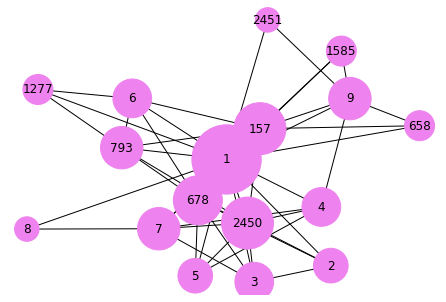

In [57]:
d = dict(ego_g["1"].degree)
nx.draw(ego_g["1"], node_color='violet', with_labels=True, nodelist=d, node_size=[d[k]*300 for k in d])

##**Graph Metrics:**


---



### **Betweenness Centrality :**

In [58]:
node_names=list (G.nodes)
for i in node_names :
    bb = nx.betweenness_centrality(ego_g[i],k=2,endpoints=False, normalized=False)
    nx.set_node_attributes(ego_g[i], bb, "betweenness")

[50.64583333333333, 7.0, 18.333333333333336, 179.6972222222222, 238.27821275946286, 42.641666666666666, 183.08333333333334, 133.0, 16175.991666666672, 0.0, 14.0, 21.666666666666664, 867.2590277777774, 377.33333333333337, 68.35416666666666, 164.70000000000002, 474.375, 424.16666666666663, 4957.681227106226, 435.01249999999993, 398.6666666666667, 10867.65238997113, 226.50000000000003, 4.8125, 41.00833333333333, 20.767857142857146, 20.5, 327.375, 54029.75681111508, 106.25, 22.700099206349204, 79.23214285714288, 4227.333333333333, 99.8720238095238, 24.0, 20.0, 188.37916666666666, 1756.6799062049065, 4.375, 165.10416666666669, 467.25000000000006, 2097.1683441558444, 9898.174999999994, 224650.02691405805, 1799.5, 516.4186507936508, 430.8387445887445, 877.9763888888893, 298.9333333333333, 2892.7500000000005, 4.3125, 53.333333333333336, 1.0, 112.33035714285714, 74.25, 19.7, 9.0, 139.33333333333334, 11228.770833333334, 184.91666666666669, 4.0, 4389.291369047624, 146.5, 337.47321428571433, 43.75

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log


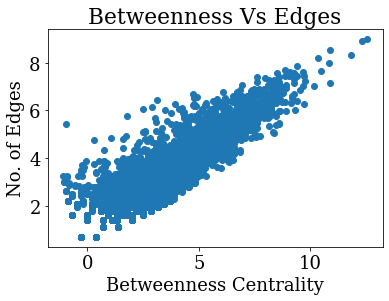

In [59]:
node_names=list (G.nodes)
def mod(n):
  p=[]
  for i in n:
    if (i<0) :
      p.append (-i+1)
    else:
      p.append (i+1)
  return (p)
  
x1=[]
y=[]
for i in node_names :
  d=nx.get_node_attributes(ego_g[i], "betweenness")
  s=0
  t=0
  for j in d: 
    s=s+d[j]
    t=t+1
  x1.append(d[i])
  #x1.append (s/t)
  y.append (len(ego_g[i].edges))
print(x1)
print(y)


logx1=np.log(x1)
logy=np.log(y)

plt.scatter(logx1,logy)
plt.title("Betweenness Vs Edges")
plt.xlabel("Betweenness Centrality")
plt.ylabel("No. of Edges")
plt.show()


### **Closeness Centrality**

[0.0625, 0.14285714285714285, 0.1111111111111111, 0.023255813953488372, 0.023809523809523808, 0.0625, 0.04, 0.05555555555555555, 0.004975124378109453, 1.0, 0.16666666666666666, 0.1111111111111111, 0.016666666666666666, 0.03225806451612903, 0.0625, 0.043478260869565216, 0.03125, 0.02040816326530612, 0.006666666666666667, 0.02631578947368421, 0.03225806451612903, 0.005050505050505051, 0.034482758620689655, 0.1, 0.05555555555555555, 0.058823529411764705, 0.07142857142857142, 0.038461538461538464, 0.0019157088122605363, 0.030303030303030304, 0.05555555555555555, 0.03571428571428571, 0.00847457627118644, 0.045454545454545456, 0.14285714285714285, 0.14285714285714285, 0.03571428571428571, 0.012345679012345678, 0.16666666666666666, 0.041666666666666664, 0.02857142857142857, 0.008620689655172414, 0.006172839506172839, 0.001321003963011889, 0.016666666666666666, 0.02040816326530612, 0.02040816326530612, 0.016666666666666666, 0.03225806451612903, 0.012048192771084338, 0.125, 0.06666666666666667,

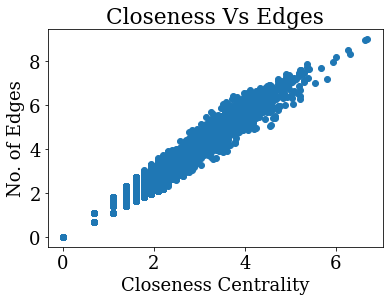

In [60]:
node_names=list (G.nodes)

x2=[]
y=[]
cc={}
for i in node_names :
  k=ego_g[i].degree(i)
  x2.append(1/k)
  y.append (len(ego_g[i].edges))
  cc[i]=1/k

nx.set_node_attributes(G, cc, "closeness") 
print(x2)
print(y)


logx2=-np.log(x2)
logy=np.log(y)

plt.scatter(logx2,logy)
plt.title("Closeness Vs Edges")
plt.xlabel("Closeness Centrality")
plt.ylabel("No. of Edges")
plt.show()


### **Brokerage :**

[88, 14, 24, 686, 628, 82, 267, 131, 19172, 0, 12, 28, 1548, 397, 98, 200, 419, 1037, 10703, 611, 410, 18454, 350, 8, 76, 76, 39, 255, 131534, 378, 85, 276, 6212, 157, 17, 19, 300, 2994, 11, 239, 523, 5822, 12461, 279364, 1558, 1006, 958, 1499, 379, 3015, 12, 67, 1, 289, 111, 31, 17, 136, 11830, 296, 3, 9056, 207, 722, 54, 8, 1209, 365, 41, 11, 21, 16, 0, 589, 729, 684, 899, 1246, 703, 1085, 314, 1286, 762, 99, 1532, 1396, 1289, 6192, 3803, 357, 490, 1235, 830, 1653, 228, 249, 571, 1317, 677, 2250, 610, 4149, 689, 1742, 161, 5300, 1856, 9251, 1978, 4, 3, 477, 1, 1135, 1007, 2, 3446, 10, 0, 449, 82, 54988, 1, 205, 118, 0, 1, 3, 1, 35, 47, 0, 1236, 26, 1, 14, 915, 5850, 5, 595, 9, 4, 317, 1804, 0, 88, 46, 46, 0, 0, 314843, 0, 7, 0, 0, 771, 1199, 10, 4181, 2446, 1094, 5, 26, 0, 2383, 20028, 1966, 5367, 16227, 45, 21, 156, 1, 198, 593, 10, 0, 10, 344, 210, 307, 43, 4, 2648, 41, 306, 6836, 48, 41, 530, 67, 2377, 367, 0, 303, 39, 7, 560, 29, 502, 79, 2035, 124, 111, 135, 20, 7580, 4140, 0, 2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


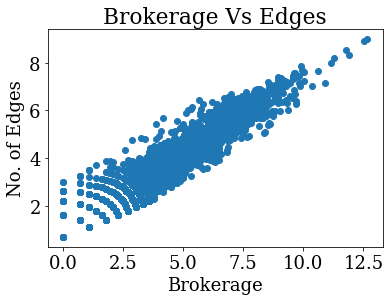

In [61]:
def facsum(n):
  s=0
  for i in range(n):
    s=s+i
  return s
x3=[]
y=[]
br={}
for i in node_names:
  d=ego_g[i].degree(i)
  e=len(ego_g[i].edges)
  f=facsum(d)
  f=f-(e-d)
  x3.append(f)
  y.append(e)
  br[i]=f
print(x3)
print(y)

nx.set_node_attributes(G, br, "brokerage")

logx3=np.log(x3)
logy=np.log(y)

plt.scatter(logx3,logy)
plt.title("Brokerage Vs Edges")
plt.xlabel("Brokerage")
plt.ylabel("No. of Edges")
plt.show()

## **Splitting Dataset into Training & Testing :**


---



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log


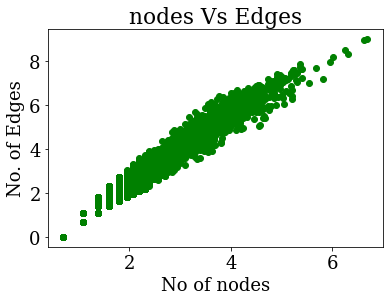

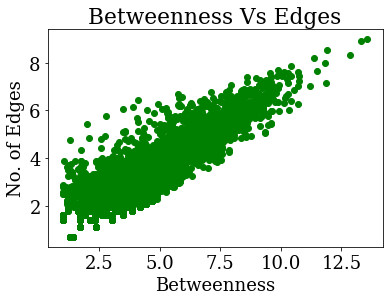

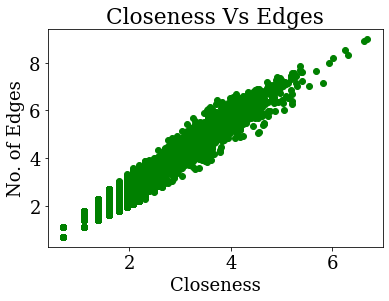

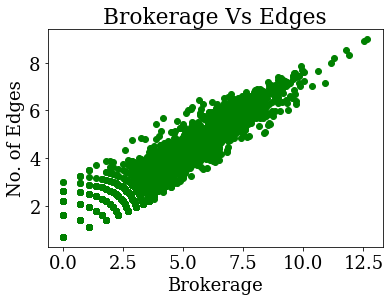

In [62]:
node_names=list (G.nodes)

def mod(n):
  p=[]
  for i in n:
    if (i<0) :
      p.append (-i+1)
    else:
      p.append (i+1)
  return (p)

y=[]
x=[]
x1=[]
x2=[]
x3=[]
d3=nx.get_node_attributes(G, "brokerage")
d2=nx.get_node_attributes(G, "closeness")

for i in node_names :
  d1=nx.get_node_attributes(ego_g[i], "betweenness")
  s=0
  t=0
  for j in d1: 
    s=s+d1[j]
    t=t+1
  x.append (len(ego_g[i].nodes))
  #x1.append (s/t)
  x1.append(d1[i])
  k=ego_g[i].degree(i)
  if (k==1):
    x2.append(0)
  else:
    x2.append(d2[i])
  x3.append (d3[i])
  y.append (len(ego_g[i].edges))

logx=np.log(x)
logx1=mod(np.log(x1))
logx2=-np.log(x2)
logx3=np.log(x3)
logy=np.log(y)

plt.scatter(logx, logy,color='g',marker='o')
plt.title("nodes Vs Edges")
plt.xlabel("No of nodes")
plt.ylabel("No. of Edges")
plt.show()

plt.scatter(logx1, logy,color='g',marker='o')
plt.title("Betweenness Vs Edges")
plt.xlabel("Betweenness")
plt.ylabel("No. of Edges")
plt.show()

plt.scatter(logx2, logy,color='g',marker='o')
plt.title("Closeness Vs Edges")
plt.xlabel("Closeness")
plt.ylabel("No. of Edges")
plt.show()

plt.scatter(logx3, logy,color='g',marker='o')
plt.title("Brokerage Vs Edges")
plt.xlabel("Brokerage")
plt.ylabel("No. of Edges")
plt.show()




In [63]:
print("Node :",node_names)
print("Node :",x)
print("Betweenness :",x1)
print("Closeness :",x2)
print("Brokerage :",x3)
print("Edges :",y)
ddd = pd.DataFrame(list (zip(node_names,x,x1,x2,x3,y)),columns =['nodes_name','nodes','betweenness','closeness','brokerage', 'edges'])
print(ddd)
ddd.to_csv(r'/content/gdrive/My Drive/Dataset/final_dataset.csv', index = False)

Node : ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '150', '151', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163

X1_train:  [0.0, 4.5, 7.5, 443.1285714285714, 0.75, 0.0, 14.625, 982.0416666666667, 56.368542568542566, 3.75, 0.0, 2.0, 3.75, 10.0, 19.0, 6474.325000000003, 24.375, 39.875, 31.5, 6.25, 1314.1625000000001, 3.0, 690.3749999999999, 2.5, 0.0, 53157.99999999999, 0.0, 0.0, 31.5, 7.5, 0.75, 818.5370129870128, 0.3333333333333333, 2.0, 2287.3264880952393, 23.916666666666664, 0.0, 77.20833333333334, 12.083333333333336, 2591.108333333333, 3.0, 1.75, 0.0, 473.02268842268836, 1.5, 0.0, 0.0, 84.65555555555552, 29.520833333333336, 7.583333333333334, 630.7791666666666, 197.0, 1.25, 0.0, 31.5, 31.5, 0.0, 2175.5708333333337, 31.5, 34.125, 0.0, 96.89166666666667, 380.0224747474747, 0.0, 0.0, 0.5833333333333333, 112.0, 34.5, 2.0, 3.0, 7.5, 44.0, 0.0, 0.0, 50.99999999999999, 41.19285714285714, 0.75, 172.06666666666666, 0.0, 3.0, 0.625, 2024.53125, 0.0, 381.33333333333337, 201.44900793650788, 0.0, 2892.7500000000005, 225.85102466977463, 478.8263888888889, 0.0, 20.862472943722945, 753.5, 181.64583333333334, 

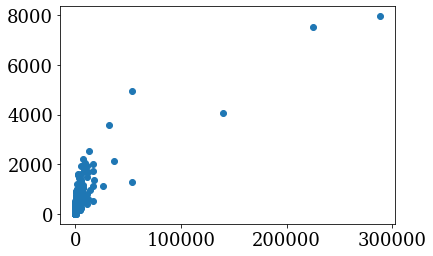

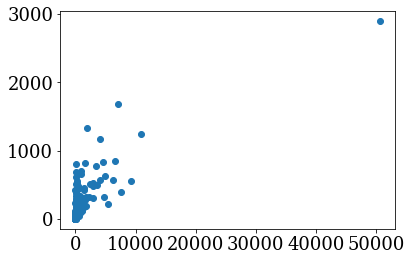

X2_train:  [0, 0.14285714285714285, 0.2, 0.02127659574468085, 0.5, 0, 0.125, 0.020833333333333332, 0.03225806451612903, 0.25, 0, 0.3333333333333333, 0.25, 0.14285714285714285, 0.14285714285714285, 0.007042253521126761, 0.08333333333333333, 0.1, 0.125, 0.25, 0.014705882352941176, 0.2, 0.022727272727272728, 0.25, 0, 0.0029850746268656717, 0, 0, 0.125, 0.2, 0.5, 0.014084507042253521, 0.14285714285714285, 0.14285714285714285, 0.011363636363636364, 0.07692307692307693, 0, 0.0625, 0.1111111111111111, 0.011764705882352941, 0.2, 0.16666666666666666, 0, 0.014925373134328358, 0.5, 0, 0.2, 0.02702702702702703, 0.08333333333333333, 0.16666666666666666, 0.021739130434782608, 0.043478260869565216, 0.25, 0, 0.125, 0.125, 0, 0.013157894736842105, 0.125, 0.07692307692307693, 0.5, 0.047619047619047616, 0.014925373134328358, 0, 0.5, 0.16666666666666666, 0.06666666666666667, 0.09090909090909091, 0.3333333333333333, 0.14285714285714285, 0.25, 0.1, 0, 0, 0.0625, 0.058823529411764705, 0.2, 0.0357142857142857

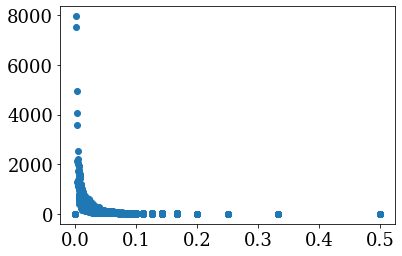

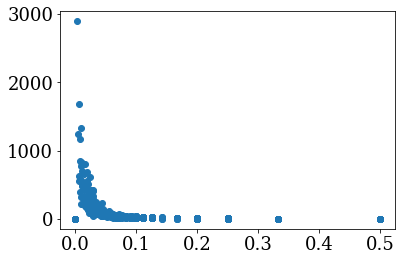

X3_train:  [0, 11, 8, 907, 1, 0, 22, 1059, 314, 4, 0, 3, 6, 13, 17, 9175, 42, 38, 28, 5, 1964, 7, 842, 3, 0, 54988, 0, 0, 28, 4, 1, 2055, 2, 12, 3525, 49, 0, 89, 24, 2789, 7, 10, 0, 1777, 1, 0, 1, 476, 47, 10, 904, 145, 2, 0, 28, 26, 0, 2648, 27, 54, 0, 159, 1711, 0, 0, 4, 97, 40, 3, 11, 6, 38, 0, 0, 89, 82, 1, 284, 0, 2, 2, 2538, 0, 351, 522, 0, 3015, 439, 560, 0, 67, 817, 395, 0, 3, 16227, 1, 54, 0, 3, 334, 0, 0, 0, 12, 509, 44, 200, 182, 426, 1, 1, 7, 4, 18, 781, 19, 3, 3, 2, 212, 9, 0, 300, 44, 0, 12, 99, 0, 0, 49, 0, 0, 920, 137, 0, 0, 135, 3, 0, 9, 0, 0, 0, 242, 143, 0, 120, 438, 111, 1, 812, 20, 355, 1, 0, 0, 0, 68, 45, 1026, 131, 665, 140, 0, 40, 2860, 0, 2, 2, 0, 0, 0, 6405, 1804, 61, 3, 18, 0, 0, 0, 2, 0, 42, 239, 35, 0, 0, 24, 1914, 3, 0, 3819, 1, 0, 232, 17, 5, 150, 0, 153, 3, 86, 0, 0, 0, 0, 20, 18, 627, 4, 240, 0, 89, 0, 0, 0, 0, 0, 20, 161, 589, 66, 1361, 175, 0, 0, 0, 1029, 314, 1, 1469, 0, 586, 9, 0, 0, 2, 11803, 0, 260, 7, 53, 15, 316, 0, 0, 0, 68, 4, 2078, 876, 4, 0,

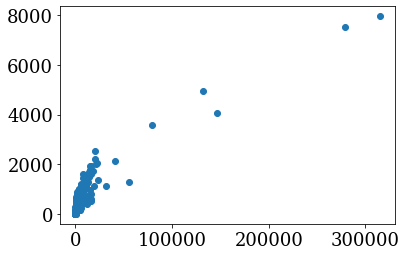

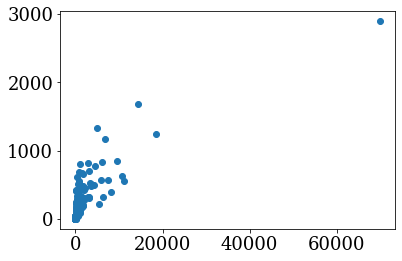

      betweenness  closeness  brokerage  edges
0        0.000000   0.000000          0      1
1        4.500000   0.142857         11     17
2        7.500000   0.200000          8      7
3      443.128571   0.021277        907    221
4        0.750000   0.500000          1      2
...           ...        ...        ...    ...
4119     6.125000   0.166667         12      9
4120   111.205357   0.041667        224     76
4121     0.000000   0.000000          0      1
4122    15.000000   0.111111         31     14
4123   105.878571   0.038462        202    149

[4124 rows x 4 columns]
      betweenness  closeness  brokerage  edges
0      424.940476   0.025641        561    219
1        5.625000   0.125000         20     16
2        0.000000   0.000000          0      1
3      390.750000   0.028571        543     87
4        0.000000   0.000000          0      1
...           ...        ...        ...    ...
1026     0.416667   0.250000          1      9
1027     0.000000   0.000000       

In [64]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y,train_size=0.8 ,test_size=0.2,random_state=86)
print("X1_train: ", X1_train)
print("y1_train: ", y1_train)
print("X1_test: ", X1_test)
print("y1_test: ", y1_test)
plt.scatter(X1_train,y1_train)
plt.show()
plt.scatter(X1_test,y1_test)
plt.show()

X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y,train_size=0.8 ,test_size=0.2,random_state=86)
print("X2_train: ", X2_train)
print("y2_train: ", y2_train)
print("X2_test: ", X2_test)
print("y2_test: ", y2_test)
plt.scatter(X2_train,y2_train)
plt.show()
plt.scatter(X2_test,y2_test)
plt.show()

X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y,train_size=0.8 ,test_size=0.2,random_state=86)
print("X3_train: ", X3_train)
print("y3_train: ", y3_train)
print("X3_test: ", X3_test)
print("y3_test: ", y3_test)
plt.scatter(X3_train,y3_train)
plt.show()
plt.scatter(X3_test,y3_test)
plt.show()

df = pd.DataFrame(list (zip(X1_train,X2_train,X3_train,y1_train)),columns =['betweenness','closeness','brokerage', 'edges'])
print(df)
dft=pd.DataFrame(list (zip(X1_test,X2_test,X3_test,y1_test)),columns =['betweenness','closeness','brokerage', 'edges'])
print(dft)
df.to_csv(r'/content/gdrive/My Drive/Dataset/train_dataset.csv', index = False)
dft.to_csv(r'/content/gdrive/My Drive/Dataset/test_dataset.csv', index = False)

## **Power Law Fitting :**

---



https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html

### **Power Law (Betweenness):**


---



In [65]:
df=df.sort_values(by = 'betweenness',ascending=True)
df=df.reset_index(drop=True)
df = df[df.betweenness != 0]
df=df.reset_index(drop=True)
print (df)

        betweenness  closeness  brokerage  edges
0          0.333333   0.142857          2     26
1          0.350000   0.166667          1     20
2          0.375000   0.200000          1     14
3          0.400000   0.142857          2     26
4          0.400000   0.142857          3     25
...             ...        ...        ...    ...
2870   53158.000000   0.002985      54988   1292
2871   54029.756811   0.001916     131534   4969
2872  139873.020833   0.001821     146903   4072
2873  224650.026914   0.001321     279364   7539
2874  288163.650000   0.001245     314843   7963

[2875 rows x 4 columns]


Text(0, 0.5, 'No. of Edges')

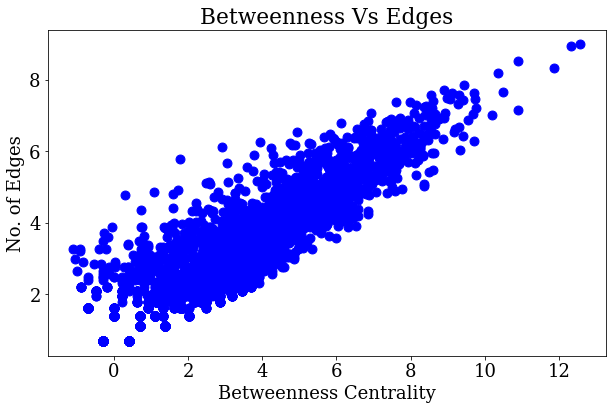

In [66]:

log_edges=np.log(df[['edges']])
log_betweenness=np.log(df[['betweenness']])


fig,a=plt.subplots(figsize=(10,6))
a.scatter(log_betweenness,log_edges,s=80,color='blue')
plt.title("Betweenness Vs Edges")
plt.xlabel("Betweenness Centrality")
plt.ylabel("No. of Edges")

In [67]:
import pickle
r1=[]
u1=[]
for i in range (3): 
  dflog=np.log(df[['edges','betweenness']])
  model1=ols('edges ~ betweenness', data=dflog).fit()
  r1.append(model1.rsquared)
  u1.append(list (model1.params))

m1=0  
m1=max(r1)
for i in range(len(r1)):
  if (r1[i]==m1):
    c1= u1[i][0]
    q1= u1[i][1]
print (m1,c1,q1)
print (model1.summary())
filename = '/content/gdrive/My Drive/Models/finalized_model1ad.sav'
pickle.dump(model1, open(filename, 'wb'))

0.8128728584457555 1.212660648662718 0.6216411544954202
                            OLS Regression Results                            
Dep. Variable:                  edges   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                 1.248e+04
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:18:16   Log-Likelihood:                -3124.6
No. Observations:                2875   AIC:                             6253.
Df Residuals:                    2873   BIC:                             6265.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [68]:
c1,q1=model1.params
print(c1,q1)
c1=2.71828 ** c1
print(c1)
print(model1.rsquared)

edges_hat1 = c1 * (df[['betweenness']]**q1)
df.insert(loc =1,value =edges_hat1,column='edges_hat1')
print(df)

1.212660648662718 0.6216411544954202
3.3624162345620117
0.8128728584457555
        betweenness   edges_hat1  closeness  brokerage  edges
0          0.333333     1.698452   0.142857          2     26
1          0.350000     1.750755   0.166667          1     20
2          0.375000     1.827476   0.200000          1     14
3          0.400000     1.902285   0.142857          2     26
4          0.400000     1.902285   0.142857          3     25
...             ...          ...        ...        ...    ...
2870   53158.000000  2912.456278   0.002985      54988   1292
2871   54029.756811  2942.055924   0.001916     131534   4969
2872  139873.020833  5314.366111   0.001821     146903   4072
2873  224650.026914  7134.575486   0.001321     279364   7539
2874  288163.650000  8328.904589   0.001245     314843   7963

[2875 rows x 5 columns]


Text(0, 0.5, 'No. of Edges')

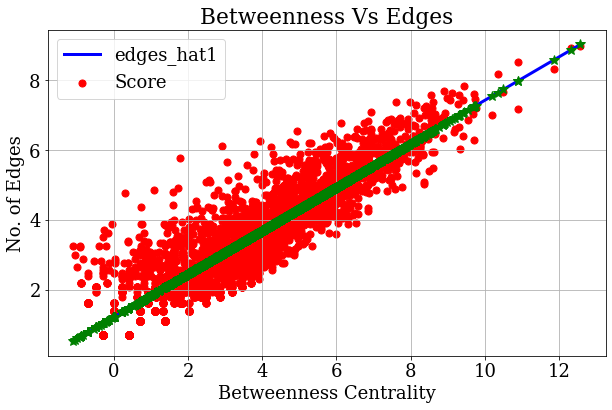

In [69]:
log_edgeshat1=np.log(df[['edges_hat1']])
o3=log_edgeshat1['edges_hat1'].tolist()

matplotlib.rcParams.update({'font.size':18,"font.family":'serif'})

fig , me=plt.subplots(figsize=(10,6))

me.scatter(log_betweenness,log_edges,s=50,color='red',label='Score')
me.plot(log_betweenness,log_edgeshat1,lw=3,label='edges_hat1',color='blue')
me.plot(log_betweenness,log_edgeshat1, r'g*', markersize=10)
me.legend(loc=0)
me.grid(True)
plt.title("Betweenness Vs Edges")
plt.xlabel("Betweenness Centrality")
plt.ylabel("No. of Edges")

### **Power Law (Closeness):**


---



In [70]:
df=df.sort_values(by = 'closeness',ascending=True)
df=df.reset_index(drop=True)
df = df[df.closeness != 0]
df=df.reset_index(drop=True)
print (df)

        betweenness   edges_hat1  closeness  brokerage  edges
0     288163.650000  8328.904589   0.001245     314843   7963
1     224650.026914  7134.575486   0.001321     279364   7539
2     139873.020833  5314.366111   0.001821     146903   4072
3      54029.756811  2942.055924   0.001916     131534   4969
4      31456.475796  2101.905329   0.002463      79029   3592
...             ...          ...        ...        ...    ...
2870       0.750000     2.811800   0.500000          1      2
2871       0.750000     2.811800   0.500000          1      2
2872       0.750000     2.811800   0.500000          1      2
2873       1.500000     4.326304   0.500000          1      2
2874       1.500000     4.326304   0.500000          1      2

[2875 rows x 5 columns]


Text(0, 0.5, 'No. of Edges')

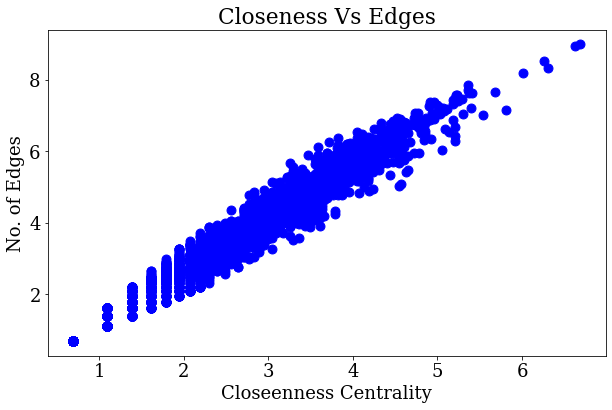

In [71]:
log_edges=np.log(df[['edges']])
log_closeness=-(np.log(df[['closeness']]))
fig , a=plt.subplots(figsize=(10,6))
a.scatter(log_closeness,log_edges,s=80,color='blue')
plt.title("Closeness Vs Edges")
plt.xlabel("Closeenness Centrality")
plt.ylabel("No. of Edges")

In [72]:
r2=[]
u2=[]
for i in range (3): 
  dflog=np.log(df[['edges','closeness']])
  model2=ols('edges ~ closeness', data=dflog).fit()
  r2.append(model2.rsquared)
  u2.append(list (model2.params))
  
m2= max(r2)
for i in range(len(r2)):
  if (r2[i]==m2):
    c2= u2[i][0]
    q2= u2[i][1]
print (m2,c2,q2)
print (model2.summary())

filename = '/content/gdrive/My Drive/Models/finalized_model2ad.sav'
pickle.dump(model2, open(filename, 'wb'))

0.9619060830941297 -0.2722135555602995 -1.4604682506135596
                            OLS Regression Results                            
Dep. Variable:                  edges   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 7.255e+04
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:18:17   Log-Likelihood:                -836.45
No. Observations:                2875   AIC:                             1677.
Df Residuals:                    2873   BIC:                             1689.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [73]:
c2,q2=model2.params
print(c2,q2)
c2=2.71828 ** c2
print(c2)
print(model2.rsquared)

#e^(-1.2870)
#edges_hat = 0.2760978354 * df[['betweeness']]**(-1.5092)
edges_hat2 = c2 * df[['closeness']]**(q2)
df.insert(loc =1,value =edges_hat2,column='edges_hat2')
print(df)

-0.2722135555602995 -1.4604682506135596
0.7616917197172541
0.9619060830941297
        betweenness    edges_hat2   edges_hat1  closeness  brokerage  edges
0     288163.650000  13305.281440  8328.904589   0.001245     314843   7963
1     224650.026914  12206.955375  7134.575486   0.001321     279364   7539
2     139873.020833   7635.503205  5314.366111   0.001821     146903   4072
3      54029.756811   7093.339063  2942.055924   0.001916     131534   4969
4      31456.475796   4914.153152  2101.905329   0.002463      79029   3592
...             ...           ...          ...        ...        ...    ...
2870       0.750000      2.096158     2.811800   0.500000          1      2
2871       0.750000      2.096158     2.811800   0.500000          1      2
2872       0.750000      2.096158     2.811800   0.500000          1      2
2873       1.500000      2.096158     4.326304   0.500000          1      2
2874       1.500000      2.096158     4.326304   0.500000          1      2

[2875 row

Text(0, 0.5, 'No. of Edges')

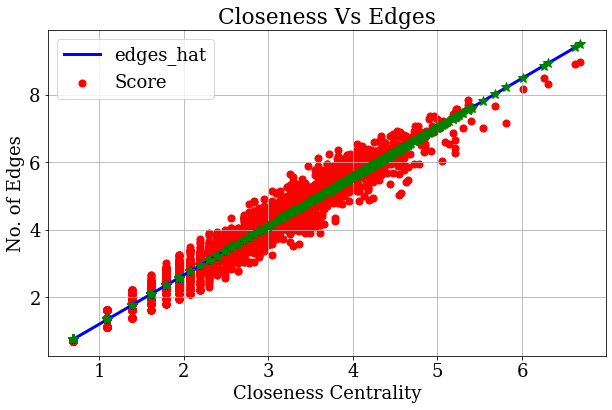

In [74]:
log_edges=np.log(df[['edges']])
log_closeness=-(np.log(df[['closeness']]))
log_edgeshat2=np.log(df[['edges_hat2']])

matplotlib.rcParams.update({'font.size':18,"font.family":'serif'})

fig , me=plt.subplots(figsize=(10,6))

me.scatter(log_closeness,log_edges,s=50,color='red',label='Score')
me.plot(log_closeness,log_edgeshat2,lw=3,label='edges_hat',color='blue')
me.plot(log_closeness,log_edgeshat2, r'g*', markersize=10)
me.legend(loc=0)
me.grid(True)
plt.title("Closeness Vs Edges")
plt.xlabel("Closeness Centrality")
plt.ylabel("No. of Edges")

### **Power Law (Brokerage):**


---

In [75]:
df=df.sort_values(by = 'brokerage',ascending=True)
df=df.reset_index(drop=True)
df = df[df.brokerage != 0]
df=df.reset_index(drop=True)
print (df)

        betweenness    edges_hat2   edges_hat1  closeness  brokerage  edges
0          1.500000      2.096158     4.326304   0.500000          1      2
1          0.750000      2.096158     2.811800   0.500000          1      2
2          0.750000      2.096158     2.811800   0.500000          1      2
3          0.750000      2.096158     2.811800   0.500000          1      2
4          0.750000      2.096158     2.811800   0.500000          1      2
...             ...           ...          ...        ...        ...    ...
2870   31456.475796   4914.153152  2101.905329   0.002463      79029   3592
2871   54029.756811   7093.339063  2942.055924   0.001916     131534   4969
2872  139873.020833   7635.503205  5314.366111   0.001821     146903   4072
2873  224650.026914  12206.955375  7134.575486   0.001321     279364   7539
2874  288163.650000  13305.281440  8328.904589   0.001245     314843   7963

[2875 rows x 6 columns]


Text(0, 0.5, 'No. of Edges')

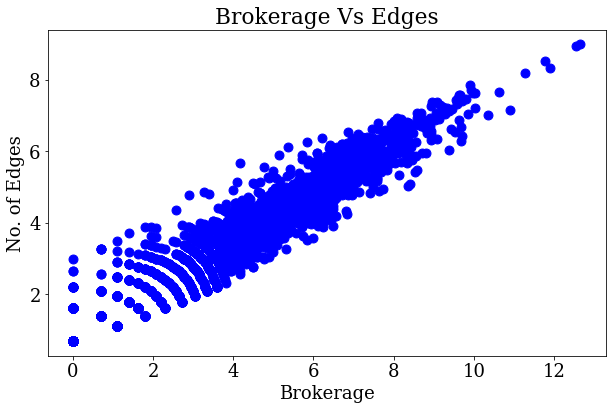

In [76]:
log_edges=np.log(df[['edges']])
log_brokerage=np.log(df[['brokerage']])
fig , a=plt.subplots(figsize=(10,6))
a.scatter(log_brokerage,log_edges,s=80,color='blue')
plt.title("Brokerage Vs Edges")
plt.xlabel("Brokerage")
plt.ylabel("No. of Edges")

In [77]:
r3=[]
u3=[]
for i in range (3): 
  dflog=np.log(df[['edges','brokerage']])
  model3=ols('edges ~ brokerage', data=dflog).fit()
  r3.append(model3.rsquared)
  u3.append(list (model3.params))
  
m3= max(r3)
for i in range(len(r3)):
  if (r3[i]==m3):
    c3= u3[i][0]
    q3= u3[i][1]
print (m3,c3,q3)
print (model3.summary())

filename = '/content/gdrive/My Drive/Models/finalized_model3ad.sav'
pickle.dump(model3, open(filename, 'wb'))

0.9127211497910844 0.8984033338024258 0.6469281784048786
                            OLS Regression Results                            
Dep. Variable:                  edges   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 3.004e+04
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        10:18:17   Log-Likelihood:                -2028.2
No. Observations:                2875   AIC:                             4060.
Df Residuals:                    2873   BIC:                             4072.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [78]:
c3,q3=model3.params
print(c3,q3)
c3=2.71828 ** c3
print(c3)
print(model3.rsquared)

#e^(-1.2870)
#edges_hat = 0.2760978354 * df[['betweeness']]**(-1.5092)
edges_hat3 = c3 * df[['brokerage']]**(q3)
df.insert(loc =1,value =edges_hat3,column='edges_hat3')
print(df)

0.8984033338024258 0.6469281784048786
2.4556775955284547
0.9127211497910844
        betweenness   edges_hat3    edges_hat2  ...  closeness  brokerage  edges
0          1.500000     2.455678      2.096158  ...   0.500000          1      2
1          0.750000     2.455678      2.096158  ...   0.500000          1      2
2          0.750000     2.455678      2.096158  ...   0.500000          1      2
3          0.750000     2.455678      2.096158  ...   0.500000          1      2
4          0.750000     2.455678      2.096158  ...   0.500000          1      2
...             ...          ...           ...  ...        ...        ...    ...
2870   31456.475796  3619.823856   4914.153152  ...   0.002463      79029   3592
2871   54029.756811  5032.934683   7093.339063  ...   0.001916     131534   4969
2872  139873.020833  5405.913394   7635.503205  ...   0.001821     146903   4072
2873  224650.026914  8193.179510  12206.955375  ...   0.001321     279364   7539
2874  288163.650000  8852.038848 

Text(0, 0.5, 'No. of Edges')

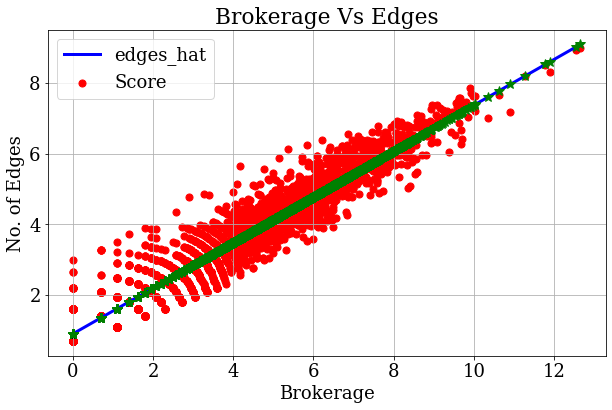

In [79]:
log_edges=np.log(df[['edges']])
log_brokerage=(np.log(df[['brokerage']]))
log_edgeshat3=np.log(df[['edges_hat3']])

matplotlib.rcParams.update({'font.size':18,"font.family":'serif'})

fig , me=plt.subplots(figsize=(10,6))

me.scatter(log_brokerage,log_edges,s=50,color='red',label='Score')
me.plot(log_brokerage,log_edgeshat3,lw=3,label='edges_hat',color='blue')
me.plot(log_brokerage,log_edgeshat3, r'g*', markersize=10)
me.legend(loc=0)
me.grid(True)
plt.title("Brokerage Vs Edges")
plt.xlabel("Brokerage")
plt.ylabel("No. of Edges")

## **Testing :**


---



### **Power Law (Betweenness):**


---


In [80]:

dft=dft.sort_values(by = 'betweenness',ascending=True)
dft=dft.reset_index(drop=True)
print (dft)
dft = dft[dft.betweenness != 0]
dft=dft.reset_index(drop=True)
print (dft)


       betweenness  closeness  brokerage  edges
0         0.000000   0.500000          0      3
1         0.000000   0.000000          0      1
2         0.000000   0.000000          0      1
3         0.000000   0.000000          0      1
4         0.000000   0.000000          0      1
...            ...        ...        ...    ...
1026   7031.358766   0.005587      14432   1678
1027   7557.000000   0.007634       8246    400
1028   9296.512500   0.006536      11231    550
1029  10867.652390   0.005051      18454   1247
1030  50616.006867   0.002625      69876   2895

[1031 rows x 4 columns]
      betweenness  closeness  brokerage  edges
0        0.350000   0.166667          1     20
1        0.375000   0.043478         48    228
2        0.375000   0.200000          1     14
3        0.375000   0.200000          1     14
4        0.416667   0.250000          1      9
..            ...        ...        ...    ...
694   7031.358766   0.005587      14432   1678
695   7557.000000   0.0

      betweenness   edges_hat1  closeness  brokerage  edges
0        0.350000     1.750755   0.166667          1     20
1        0.375000     1.827476   0.043478         48    228
2        0.375000     1.827476   0.200000          1     14
3        0.375000     1.827476   0.200000          1     14
4        0.416667     1.951176   0.250000          1      9
..            ...          ...        ...        ...    ...
694   7031.358766   828.188889   0.005587      14432   1678
695   7557.000000   866.149953   0.007634       8246    400
696   9296.512500   985.195764   0.006536      11231    550
697  10867.652390  1085.624296   0.005051      18454   1247
698  50616.006867  2825.077869   0.002625      69876   2895

[699 rows x 5 columns]


Text(0, 0.5, 'No. of Edges')

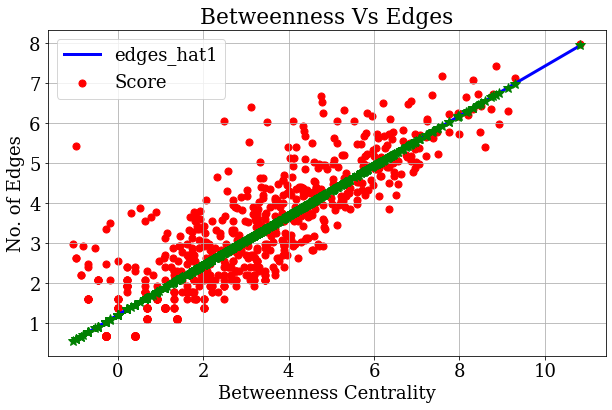

In [81]:
edges_hat1 = c1 * (dft[['betweenness']]**q1)
dft.insert(loc =1,value =edges_hat1,column='edges_hat1')
print(dft)

log_edges=np.log(dft[['edges']])
log_betweenness=(np.log(dft[['betweenness']]))
log_edgeshat1=np.log(dft[['edges_hat1']])

matplotlib.rcParams.update({'font.size':18,"font.family":'serif'})

fig , me=plt.subplots(figsize=(10,6))

me.scatter(log_betweenness,log_edges,s=50,color='red',label='Score')
me.plot(log_betweenness,log_edgeshat1,lw=3,label='edges_hat1',color='blue')
me.plot(log_betweenness,log_edgeshat1, r'g*', markersize=10)
me.legend(loc=0)
me.grid(True)
plt.title("Betweenness Vs Edges")
plt.xlabel("Betweenness Centrality")
plt.ylabel("No. of Edges")

In [82]:
from sklearn.metrics import r2_score
def mymodel(x):
  y=[]
  for i in x:
    if (i==0):
      y.append(0)
    else:  
      y.append(c1 * i**q1)
  return y

r2 = r2_score(y1_test, mymodel(X1_test))

print(r2)

0.7163948280696747


### **Power Law (Closeness):**


---


In [83]:

dft=dft.sort_values(by = 'closeness',ascending=True)
dft=dft.reset_index(drop=True)
print (dft)
dft = dft[dft.closeness != 0]
dft=dft.reset_index(drop=True)
print (dft)


      betweenness   edges_hat1  closeness  brokerage  edges
0    50616.006867  2825.077869   0.002625      69876   2895
1    10867.652390  1085.624296   0.005051      18454   1247
2     7031.358766   828.188889   0.005587      14432   1678
3     9296.512500   985.195764   0.006536      11231    550
4     4957.681227   666.482466   0.006667      10703    622
..            ...          ...        ...        ...    ...
694      0.750000     2.811800   0.500000          1      2
695      0.750000     2.811800   0.500000          1      2
696      0.750000     2.811800   0.500000          1      2
697      1.500000     4.326304   0.500000          1      2
698      0.750000     2.811800   0.500000          1      2

[699 rows x 5 columns]
      betweenness   edges_hat1  closeness  brokerage  edges
0    50616.006867  2825.077869   0.002625      69876   2895
1    10867.652390  1085.624296   0.005051      18454   1247
2     7031.358766   828.188889   0.005587      14432   1678
3     9296.51250

      betweenness   edges_hat2   edges_hat1  closeness  brokerage  edges
0    50616.006867  4478.558162  2825.077869   0.002625      69876   2895
1    10867.652390  1721.812384  1085.624296   0.005051      18454   1247
2     7031.358766  1485.934135   828.188889   0.005587      14432   1678
3     9296.512500  1181.548917   985.195764   0.006536      11231    550
4     4957.681227  1147.866625   666.482466   0.006667      10703    622
..            ...          ...          ...        ...        ...    ...
694      0.750000     2.096158     2.811800   0.500000          1      2
695      0.750000     2.096158     2.811800   0.500000          1      2
696      0.750000     2.096158     2.811800   0.500000          1      2
697      1.500000     2.096158     4.326304   0.500000          1      2
698      0.750000     2.096158     2.811800   0.500000          1      2

[699 rows x 6 columns]


Text(0, 0.5, 'No. of Edges')

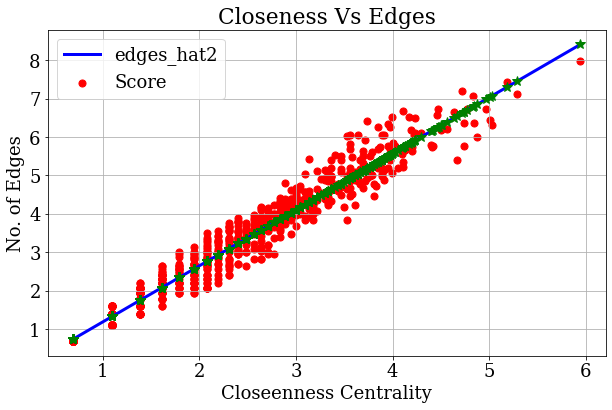

In [84]:
edges_hat2 = c2 * dft[['closeness']]**(q2)
dft.insert(loc =1,value =edges_hat2,column='edges_hat2')
print(dft)

log_edges=np.log(dft[['edges']])
log_closeness=-(np.log(dft[['closeness']]))
log_edgeshat2=np.log(dft[['edges_hat2']])

matplotlib.rcParams.update({'font.size':18,"font.family":'serif'})

fig , me=plt.subplots(figsize=(10,6))

me.scatter(log_closeness,log_edges,s=50,color='red',label='Score')
me.plot(log_closeness,log_edgeshat2,lw=3,label='edges_hat2',color='blue')
me.plot(log_closeness,log_edgeshat2, r'g*', markersize=10)
me.legend(loc=0)
me.grid(True)
plt.title("Closeness Vs Edges")
plt.xlabel("Closeenness Centrality")
plt.ylabel("No. of Edges")

In [85]:
from sklearn.metrics import r2_score
def mymodel(x):
  y=[]
  for i in x:
    if (i==0):
      y.append(0)
    else:  
      y.append(c2 * i**q2)
  return y

r2 = r2_score(y1_test, mymodel(X2_test))
print(r2)

0.7516724059744717


### **Power Law (Brokerage):**


---


In [86]:

dft=dft.sort_values(by = 'brokerage',ascending=True)
dft=dft.reset_index(drop=True)
print (dft)
dft = dft[dft.brokerage != 0]
dft=dft.reset_index(drop=True)
print (dft)


      betweenness   edges_hat2   edges_hat1  closeness  brokerage  edges
0        0.750000     2.096158     2.811800   0.500000          1      2
1        0.750000     2.096158     2.811800   0.500000          1      2
2        0.750000     2.096158     2.811800   0.500000          1      2
3        0.750000     2.096158     2.811800   0.500000          1      2
4        0.750000     2.096158     2.811800   0.500000          1      2
..            ...          ...          ...        ...        ...    ...
694   4957.681227  1147.866625   666.482466   0.006667      10703    622
695   9296.512500  1181.548917   985.195764   0.006536      11231    550
696   7031.358766  1485.934135   828.188889   0.005587      14432   1678
697  10867.652390  1721.812384  1085.624296   0.005051      18454   1247
698  50616.006867  4478.558162  2825.077869   0.002625      69876   2895

[699 rows x 6 columns]
      betweenness   edges_hat2   edges_hat1  closeness  brokerage  edges
0        0.750000     2.096

      betweenness   edges_hat3   edges_hat2  ...  closeness  brokerage  edges
0        0.750000     2.455678     2.096158  ...   0.500000          1      2
1        0.750000     2.455678     2.096158  ...   0.500000          1      2
2        0.750000     2.455678     2.096158  ...   0.500000          1      2
3        0.750000     2.455678     2.096158  ...   0.500000          1      2
4        0.750000     2.455678     2.096158  ...   0.500000          1      2
..            ...          ...          ...  ...        ...        ...    ...
694   4957.681227   993.052062  1147.866625  ...   0.006667      10703    622
695   9296.512500  1024.474523  1181.548917  ...   0.006536      11231    550
696   7031.358766  1204.916293  1485.934135  ...   0.005587      14432   1678
697  10867.652390  1412.620533  1721.812384  ...   0.005051      18454   1247
698  50616.006867  3342.748172  4478.558162  ...   0.002625      69876   2895

[699 rows x 7 columns]


Text(0, 0.5, 'No. of Edges')

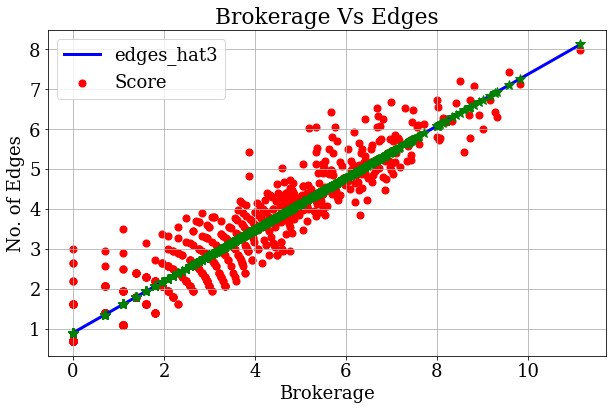

In [87]:
edges_hat3 = c3 * (dft[['brokerage']]**q3)
dft.insert(loc =1,value =edges_hat3,column='edges_hat3')
print(dft)

log_edges=np.log(dft[['edges']])
log_brokerage=(np.log(dft[['brokerage']]))
log_edgeshat3=np.log(dft[['edges_hat3']])

matplotlib.rcParams.update({'font.size':18,"font.family":'serif'})

fig , me=plt.subplots(figsize=(10,6))

me.scatter(log_brokerage,log_edges,s=50,color='red',label='Score')
me.plot(log_brokerage,log_edgeshat3,lw=3,label='edges_hat3',color='blue')
me.plot(log_brokerage,log_edgeshat3, r'g*', markersize=10)
me.legend(loc=0)
me.grid(True)
plt.title("Brokerage Vs Edges")
plt.xlabel("Brokerage")
plt.ylabel("No. of Edges")

In [88]:
from sklearn.metrics import r2_score
def mymodel(x):
  y=[]
  for i in x:
    if (i==0):
      y.append(0)
    else:  
      y.append(c3 * (i**q3))
  return y

r2 = r2_score(y1_test, mymodel(X3_test))
print(r2)

0.8150223838355011


## **Anomaly Score Calculation:**


---



In [89]:
node_names=list (G.nodes)
x={}
x1={}
x2={}
x3={}
y={}

d3=nx.get_node_attributes(G, "brokerage")
d2=nx.get_node_attributes(G, "closeness")
for i in node_names :
  d1=nx.get_node_attributes(ego_g[i], "betweenness") 
  s=0
  t=0
  for j in d1: 
    s=s+d1[j]
    t=t+1
  #x1[i]=(s/t)
  x[i]=(len(ego_g[i].nodes))
  x1[i]=d1[i]
  k=ego_g[i].degree(i)
  if (k==1):
    x2[i]=0
  else:
    x2[i]=d2[i]
  x3[i]= d3[i]
  y[i]= len(ego_g[i].edges)

print(x)
print(x1)
print(x2)
print(x3)
print(y)

{'1': 17, '2': 8, '3': 10, '4': 44, '5': 43, '6': 17, '7': 26, '8': 19, '9': 202, '10': 2, '11': 7, '12': 10, '13': 61, '14': 32, '15': 17, '16': 24, '17': 33, '18': 50, '19': 151, '20': 39, '21': 32, '22': 199, '23': 30, '25': 11, '26': 19, '27': 18, '28': 15, '29': 27, '30': 523, '31': 34, '32': 19, '33': 29, '34': 119, '35': 23, '37': 8, '38': 8, '39': 29, '40': 82, '41': 7, '42': 25, '43': 36, '44': 117, '45': 163, '46': 758, '48': 61, '49': 50, '50': 50, '51': 61, '52': 32, '53': 84, '54': 9, '55': 16, '56': 4, '57': 30, '58': 20, '59': 12, '60': 9, '61': 22, '62': 157, '63': 28, '64': 4, '65': 143, '66': 24, '67': 43, '68': 15, '69': 10, '70': 53, '71': 31, '72': 12, '73': 8, '74': 11, '75': 8, '76': 2, '78': 37, '79': 49, '80': 42, '81': 47, '82': 54, '83': 43, '84': 56, '85': 29, '86': 60, '87': 44, '88': 16, '89': 61, '90': 61, '91': 62, '92': 119, '93': 93, '94': 30, '95': 38, '96': 54, '97': 52, '98': 63, '99': 28, '100': 27, '101': 38, '102': 58, '103': 42, '104': 74, '105'

In [90]:
#x-betweenness
#y-edges
def power1(x):
    return (c1 * (x**q1))
    #return 0.2760978354 * x**(-1.5092)

def power2(x):
    return (c2 * (x**q2))

def power3(x):
    return (c3 * (x**q3))

def mod(x):
  if (x>=0):
    return x
  else:
    return (-x)

ascore1={}
ascore2={}
ascore3={}

for i in node_names :
  if (x1[i]==0):
    ascore1[i]=10000
  else :  
    ascore1[i]=( max( y[i],power1(x1[i]) ) / min( y[i],power1(x1[i]) ) ) * np.log( mod( y[i] - power1(x1[i])) + 1)

for i in node_names :
  if (x2[i]==0):
    ascore2[i]=10000
  else :  
    ascore2[i]=( max( y[i],power2(x2[i]) ) / min( y[i],power2(x2[i]) ) ) * np.log( mod( y[i] - power2(x2[i])) + 1) 

for i in node_names :
  if (x3[i]==0):
    ascore3[i]=10000
  else :  
    ascore3[i]=( max( y[i],power3(x3[i]) ) / min( y[i],power3(x3[i]) ) ) * np.log( mod( y[i] - power3(x3[i])) + 1) 


print(ascore1)
print(ascore2)
print(ascore3)



{'1': 2.9176565509043964, '2': 1.6343555935320582, '3': 0.4093486728785213, '4': 15.865509828758645, '5': 14.06168833140238, '6': 4.693676039212687, '7': 4.964988598055047, '8': 6.051461983155707, '9': 6.856981208081183, '10': 10000, '11': 4.306265045063257, '12': 2.5562862564627755, '13': 5.067455702741143, '14': 4.881052382725363, '15': 2.7501160964288767, '16': 1.758946999800438, '17': 5.472809047470259, '18': 4.93452110021441, '19': 4.090323847448963, '20': 3.2549425529627007, '21': 6.45422134414795, '22': 5.8465173418645815, '23': 3.028136382843412, '25': 19.291825273738084, '26': 11.59802673509122, '27': 13.976124447317861, '28': 11.42981330469212, '29': 4.27399389587712, '30': 12.861016856196997, '31': 14.400983503002307, '32': 15.2465125434672, '33': 11.184121940484722, '34': 7.143140638119336, '35': 5.943381796946357, '37': 5.855521988670937, '38': 6.286736402857581, '39': 3.6213310472383746, '40': 3.3847916631739685, '41': 1.1279693498808152, '42': 3.9755258296625944, '43': 5

## **Labeling Nodes :**


---



1758 3397


<BarContainer object of 2 artists>

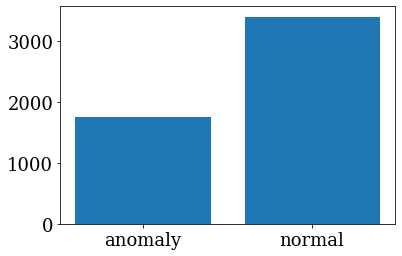

In [91]:
k={}
ca=0
cn=0
node_names= list (G.nodes)
for i in node_names :
    n=ego_g[i].number_of_nodes()
    e=ego_g[i].number_of_edges()
    d=ego_g[i].degree(i)
    m=(n*(n-1))/2
    if((e==n-1 and e<=n) or (e<m and e>m-2)):
        k[i]=1
        ca=ca+1
    else :
        k[i]=0
        cn=cn+1

nx.set_node_attributes(G, k,"result")
t={"anomaly":ca,"normal":cn}

d=nx.get_node_attributes(G, "result")

keys = t.keys()
values =t.values()
print(ca,cn)
plt.bar(keys, values)

## **Threshold Setting :**

---



In [92]:
ascorelist1 = sorted(ascore1.items(), key=lambda x:x[1])
sortdict1 = dict(ascorelist1)
print(sortdict1)
res1=list (sortdict1.values())

ascorelist2 = sorted(ascore2.items(), key=lambda x:x[1])
sortdict2 = dict(ascorelist2)
print(sortdict2)
res2=list (sortdict2.values())

ascorelist3 = sorted(ascore3.items(), key=lambda x:x[1])
sortdict3 = dict(ascorelist3)
print(sortdict3)
res3=list (sortdict3.values())

tis1 = []
tis2 = []
tis3 = []
tis1 = list(set(res1))
tis2 = list(set(res2))
tis3 = list(set(res3))


{'3634': 0.0298206328300415, '1683': 0.05568085248223459, '2655': 0.05568085248223459, '2956': 0.05568085248223459, '3674': 0.05568085248223459, '4368': 0.05568085248223459, '6239': 0.05568085248223459, '2144': 0.06119110887286037, '2489': 0.06119110887286037, '2523': 0.06795200853288398, '3861': 0.08017698803400912, '2085': 0.09794420413704123, '2918': 0.10783148745322801, '3902': 0.11788269200282843, '4441': 0.12194646141071791, '3236': 0.1275813095851513, '1558': 0.16601836919726382, '5194': 0.16601836919726382, '4186': 0.16664220815097378, '6031': 0.20495726386604174, '72': 0.2163173742158282, '704': 0.2196332292479042, '4119': 0.22101063851775551, '1882': 0.22574807474665282, '1406': 0.22886229798682484, '1111': 0.2533654019634482, '2708': 0.2601682572212237, '1590': 0.26144863474899843, '4339': 0.2701970017036091, '2517': 0.277778111442055, '853': 0.2874632191293181, '3212': 0.2884700449805351, '3147': 0.3104679833000884, '3918': 0.3104679833000884, '1087': 0.316253769556256, '44

In [93]:
print(ascore1)
print(ascore2)
print(ascore3)

{'1': 2.9176565509043964, '2': 1.6343555935320582, '3': 0.4093486728785213, '4': 15.865509828758645, '5': 14.06168833140238, '6': 4.693676039212687, '7': 4.964988598055047, '8': 6.051461983155707, '9': 6.856981208081183, '10': 10000, '11': 4.306265045063257, '12': 2.5562862564627755, '13': 5.067455702741143, '14': 4.881052382725363, '15': 2.7501160964288767, '16': 1.758946999800438, '17': 5.472809047470259, '18': 4.93452110021441, '19': 4.090323847448963, '20': 3.2549425529627007, '21': 6.45422134414795, '22': 5.8465173418645815, '23': 3.028136382843412, '25': 19.291825273738084, '26': 11.59802673509122, '27': 13.976124447317861, '28': 11.42981330469212, '29': 4.27399389587712, '30': 12.861016856196997, '31': 14.400983503002307, '32': 15.2465125434672, '33': 11.184121940484722, '34': 7.143140638119336, '35': 5.943381796946357, '37': 5.855521988670937, '38': 6.286736402857581, '39': 3.6213310472383746, '40': 3.3847916631739685, '41': 1.1279693498808152, '42': 3.9755258296625944, '43': 5

In [94]:
y_pred1 = []
y_act = []

node_names= list (G.nodes)
for i in node_names :
    n=ego_g[i].number_of_nodes()
    e=ego_g[i].number_of_edges()
    d=ego_g[i].degree(i)
    m=(n*(n - 1)) / 2
    if ( (e==n-1 and e<=n) or (e<m and e>m-2)):
        y_act.append(1)
    else :
        y_act.append(0)

f1={}
thresh1=0        
for thresh1 in tis1 :
  y_pred1= []
  for i in ascore1 :
    if (ascore1[i]>thresh1) :
      y_pred1.append(1)
    else :
      y_pred1.append(0)
  f1[thresh1]=metrics.f1_score(y_act, y_pred1)

ascorelist1 = sorted(f1.items(), key=lambda x:x[1])
sortdict1 = dict(ascorelist1)
print(sortdict1)
Keymax1 = max(sortdict1, key=sortdict1.get)
thresh1=Keymax1
print(thresh1)

f2={}
thresh2=0        
for thresh2 in tis2 :
  y_pred2 = []
  for i in ascore2 :
    if (ascore2[i]>thresh2) :
      y_pred2.append(1)
    else :
      y_pred2.append(0)
  f2[thresh2]=metrics.f1_score(y_act, y_pred2)

ascorelist2 = sorted(f2.items(), key=lambda x:x[1])
sortdict2 = dict(ascorelist2)
print(sortdict2)
Keymax2 = max(sortdict2, key=sortdict2.get)
thresh2=Keymax2
print(thresh2)

f3={}
thresh3=0        
for thresh3 in tis3 :
  y_pred3 = []
  for i in ascore3 :
    if (ascore3[i]>thresh3) :
      y_pred3.append(1)
    else :
      y_pred3.append(0)
  f3[thresh3]=metrics.f1_score(y_act, y_pred3)

ascorelist3 = sorted(f3.items(), key=lambda x:x[1])
sortdict3 = dict(ascorelist3)
print(sortdict3)
Keymax3 = max(sortdict3, key=sortdict3.get)
thresh3=Keymax3
print(thresh3)


{10000: 0.0, 0.8355555580594097: 0.47721344176768454, 0.8421115967088705: 0.47728667894413745, 0.8423184443228803: 0.4773599386032233, 0.8431708814296515: 0.4774332207552963, 0.8469037926323265: 0.4775065254107171, 0.8493154163314983: 0.4785351592552701, 0.854737265653671: 0.47919876733436056, 0.8595244585634968: 0.4792726151949453, 0.8655550652685282: 0.4793464858199753, 0.8682661042393803: 0.4794203792199785, 0.8707330824168095: 0.4794942954054887, 0.8819226871468114: 0.479568234387047, 0.889465692856002: 0.47964219617520054, 0.8918360038317972: 0.4797161807805029, 0.8928144858122533: 0.4797901882135143, 0.9016902020805242: 0.47986421848480176, 0.9035912344673945: 0.47993827160493824, 0.9107940528488934: 0.48001234758450384, 0.9185937372757162: 0.48008644643408466, 0.9187505588887397: 0.48016056816427355, 0.9204620464366845: 0.4802347127856702, 0.9230559022438461: 0.4803088803088804, 0.9272823013164716: 0.4803830707445165, 0.9307656196476983: 0.4804572841031979, 0.9384459852977688: 0

## **F-Score calculation:**


---



accuracy: (tp + tn) / (p + n)

precision(pe): tp / (tp + fp)

recall(re): tp / (tp + fn)

f-score(f1): 2 tp / (2 tp + fp + fn) : 2(pe * re) / ( pe + re )


In [95]:
tp=0
tn=0
fp=0
fn=0

y_act = []

aa=0
an=0
node_names= list (G.nodes)
for i in node_names :
    n=ego_g[i].number_of_nodes()
    e=ego_g[i].number_of_edges()
    d=ego_g[i].degree(i)
    m=(n*(n - 1)) / 2
    if ((e==n-1 and e<=n) or (e<m and e>m-2)):
        y_act.append(1)
        aa=aa+1
    else :
        y_act.append(0)
        an=an+1

pa1=0
pn1=0
yanomaly1={}
y_pred1 = []
for i in ascore1 :
  if (ascore1[i]>thresh1) :
    pa1=pa1+1
    y_pred1.append(1)
    yanomaly1[i]="anomaly"
  else :
    pn1=pn1+1
    y_pred1.append(0)
    yanomaly1[i]="normal"

print("\nThreshold=",thresh1)
print("Predicted anomaly=",pa1,"  Predicted normal=",pn1)
print("Actual anomaly=",aa,"  Actual normal=",an)
cm1=metrics.confusion_matrix(y_act, y_pred1)
tp = cm1[0][0]
fn = cm1[0][1]
fp = cm1[1][0]
tn = cm1[1][1]
print("\nTP=",tp,"  FN=",fn)
print("FP=",fp,"  TN=",tn)
print("\nConfusion matrix:")
print(cm1 )
print(metrics.classification_report(y_act, y_pred1 ))
print("F-score=",metrics.f1_score(y_act, y_pred1))

pa2=0
pn2=0
yanomaly2={}
y_pred2 = []
for i in ascore2 :
  if (ascore2[i]>thresh2) :
    pa2=pa2+1
    y_pred2.append(1)
    yanomaly2[i]="anomaly"
  else :
    pn2=pn2+1
    y_pred2.append(0)
    yanomaly2[i]="normal"

print("\nThreshold=",thresh2)
print("Predicted anomaly=",pa2,"  Predicted normal=",pn2)
print("Actual anomaly=",aa,"  Actual normal=",an)
cm2=metrics.confusion_matrix(y_act, y_pred2)
tp = cm2[0][0]
fn = cm2[0][1]
fp = cm2[1][0]
tn = cm2[1][1]
print("\nTP=",tp,"  FN=",fn)
print("FP=",fp,"  TN=",tn)
print("\nConfusion matrix :")
print(cm2)
print(metrics.classification_report(y_act, y_pred2 ))
print("F-score=",metrics.f1_score(y_act, y_pred2))

pa3=0
pn3=0
yanomaly3={}
y_pred3 = []
for i in ascore3 :
  if (ascore3[i]>thresh3) :
    pa3=pa3+1
    y_pred3.append(1)
    yanomaly3[i]="anomaly"
  else :
    pn3=pn3+1
    y_pred3.append(0)
    yanomaly3[i]="normal"

print("\nThreshold=",thresh3)
print("Predicted anomaly=",pa3,"  Predicted normal=",pn3)
print("Actual anomaly=",aa,"  Actual normal=",an)
cm3=metrics.confusion_matrix(y_act, y_pred3)
tp = cm3[0][0]
fn = cm3[0][1]
fp = cm3[1][0]
tn = cm3[1][1]
print("\nTP=",tp,"  FN=",fn)
print("FP=",fp,"  TN=",tn)
print("\nConfusion matrix:" )
print(cm3)
print(metrics.classification_report(y_act, y_pred3 ))
print("F-score=",metrics.f1_score(y_act, y_pred3))


Threshold= 676.923551828625
Predicted anomaly= 1581   Predicted normal= 3574
Actual anomaly= 1758   Actual normal= 3397

TP= 2990   FN= 407
FP= 584   TN= 1174

Confusion matrix:
[[2990  407]
 [ 584 1174]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      3397
           1       0.74      0.67      0.70      1758

    accuracy                           0.81      5155
   macro avg       0.79      0.77      0.78      5155
weighted avg       0.80      0.81      0.81      5155

F-score= 0.7032045522611561

Threshold= 22.971932161820003
Predicted anomaly= 1156   Predicted normal= 3999
Actual anomaly= 1758   Actual normal= 3397

TP= 3397   FN= 0
FP= 602   TN= 1156

Confusion matrix :
[[3397    0]
 [ 602 1156]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3397
           1       1.00      0.66      0.79      1758

    accuracy                           0.88      5155
   macro avg  

## **Anomalous Nodes :**

---



In [96]:
print("Total anomaly nodes :",pa1,pa2,pa3)
l={}
for i in node_names :
  if (yanomaly2[i]=="anomaly") :
    l[i]=1
  else :
    l[i]=0
for i in node_names :
  if (yanomaly3[i]=="anomaly") :
    l[i]=l[i]+0.8
  else :
    l[i]=l[i]
for i in node_names :
  if (yanomaly1[i]=="anomaly") :
    l[i]=l[i]+0.6
  else :
    l[i]=l[i]

c=0 
y_pred=[]
yanomaly={}
for i in node_names:
  if (l[i]>=1.6):
    yanomaly[i]="anomaly"
    y_pred.append(1)
    c=c+1
  else:
    yanomaly[i]="normal"
    y_pred.append(0)

z=[]
for i in node_names:
  if (yanomaly[i]=="anomaly"):
    z.append(i)

nx.set_node_attributes(G,yanomaly, "Anomaly")
pp=0
for i in node_names:
  if (yanomaly[i]=="anomaly"):
    if(len(ego_g[i].edges)>1):
      pp=pp+1

print("Anomalous node :",z)
print("\nPredicted anomalous nodes=",c)

nx.set_node_attributes(G,yanomaly, "Anomaly")

print("\nConfusion matrix:")
cm=metrics.confusion_matrix(y_act, y_pred )
print(cm)
print(metrics.classification_report(y_act, y_pred ))
print("F-score=",metrics.f1_score(y_act, y_pred))

Total anomaly nodes : 1581 1156 1543
Anomalous node : ['10', '76', '123', '150', '158', '160', '184', '249', '253', '313', '338', '341', '360', '380', '381', '382', '383', '386', '470', '476', '477', '482', '483', '484', '487', '494', '496', '502', '509', '520', '571', '600', '611', '616', '635', '662', '663', '685', '690', '691', '726', '730', '742', '744', '745', '752', '756', '761', '798', '821', '838', '871', '875', '909', '932', '940', '942', '978', '979', '980', '1005', '1014', '1043', '1120', '1128', '1129', '1137', '1140', '1143', '1151', '1197', '1234', '1251', '1252', '1259', '1261', '1266', '1276', '1280', '1321', '1322', '1348', '1351', '1360', '1368', '1414', '1456', '1458', '1461', '1481', '1482', '1508', '1593', '1608', '1611', '1612', '1670', '1714', '1729', '1735', '1763', '1784', '1790', '1805', '1807', '1821', '1828', '1829', '1853', '1859', '1866', '1888', '1889', '1903', '1904', '1941', '1944', '1946', '1950', '1972', '1979', '1983', '2006', '2007', '2009', '2010',

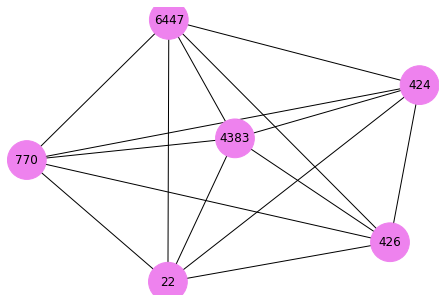

In [97]:
d = dict(ego_g["6447"].degree)
nx.draw(ego_g["6447"], node_color='violet', with_labels=True, nodelist=d, node_size=[d[k]*300 for k in d])

In [98]:

th=[]
th=[thresh1,thresh2,thresh3]

dan = pd.DataFrame(list (z),columns =['Anomalous_node'])
dan.to_csv(r'/content/gdrive/My Drive/Project/Dataset/anomalous_node.csv', index = False)
print(dan)
dth = pd.DataFrame(list (th),columns =['Threshold'])
print(dth)
dth.to_csv(r'/content/gdrive/My Drive/Project/Dataset/threshold.csv', index = False)

     Anomalous_node
0                10
1                76
2               123
3               150
4               158
...             ...
1151           6532
1152           6533
1153           6535
1154           6536
1155           6539

[1156 rows x 1 columns]
    Threshold
0  676.923552
1   22.971932
2   43.839091
